<a href="https://colab.research.google.com/github/Darshini-A/Data-Storage-Management/blob/main/MnistMulticlassificationKeras%208%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.optimizers import Adadelta

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
type(x_train)

numpy.ndarray

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [5]:
x_train_flat = x_train.reshape(60000, 784)
x_test_flat = x_test.reshape(10000, 784)
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)
print(x_train_flat.shape)
print(x_test_flat.shape)
print(y_train_ohe.shape)
print(y_test_ohe.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [6]:
print(y_train[210])
print(y_train_ohe[210])

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
print(y_train)
print(y_train.shape)

[5 0 4 ... 5 6 8]
(60000,)


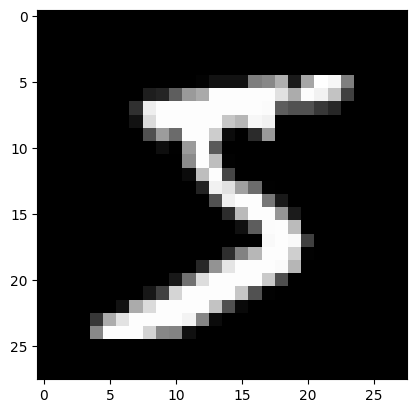

In [8]:
plt.imshow(x_train[0], cmap="gray")
plt.show()

In [9]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=100, activation="relu", kernel_regularizer=L1L2(l1=0, l2=0.5)))
model.add(Dense(units=10, activation = "softmax"))
model.compile(optimizer=Adadelta(learning_rate=0.05),
              loss="categorical_crossentropy",
              metrics="accuracy")
model.fit(x=x_train_flat, y=y_train_ohe, epochs=30, validation_data=(x_test_flat, y_test_ohe), batch_size=32)

Epoch 1/30
1875/1875 [==============================] - 7s 3ms/step - loss: 69.1873 - accuracy: 0.7153 - val_loss: 45.5152 - val_accuracy: 0.8475
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 37.9704 - accuracy: 0.8652 - val_loss: 31.8255 - val_accuracy: 0.8817
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 27.2596 - accuracy: 0.8916 - val_loss: 23.5109 - val_accuracy: 0.8954
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 20.2270 - accuracy: 0.9067 - val_loss: 17.7120 - val_accuracy: 0.9065
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 15.2335 - accuracy: 0.9175 - val_loss: 13.4619 - val_accuracy: 0.9133
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 11.5584 - accuracy: 0.9264 - val_loss: 10.3526 - val_accuracy: 0.9158
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 8.8460 - accuracy: 0.9319 - val_loss: 7.9860 - v

In [10]:
history = model.history.history

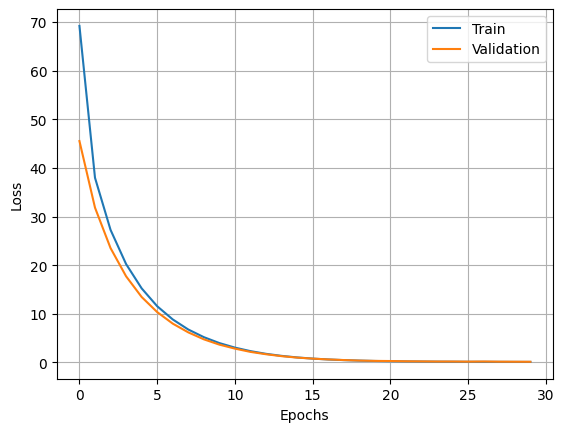

In [11]:
train_loss= history["loss"]
val_loss= history["val_loss"]

plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(["Train", "Validation"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

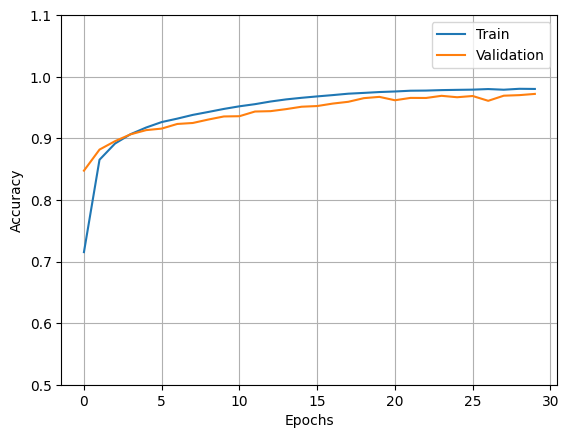

In [12]:
train_acc = history["accuracy"]
val_acc = history["val_accuracy"]

plt.plot(train_acc)
plt.plot(val_acc)
plt.ylim(0.5,1.1)
plt.legend(["Train", "Validation"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


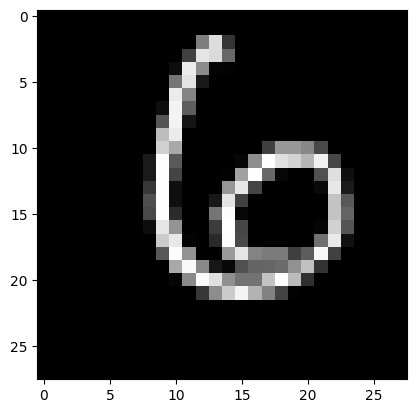

In [14]:
plt.imshow(x_test[100], cmap="gray")
plt.show()

In [15]:
preds = model.predict(x_test_flat)

313/313 [==============================] - 1s 1ms/step


In [16]:
preds.shape

(10000, 10)

In [17]:
print(preds[100])
print(np.argmax(preds[100]))

[2.6880373e-06 2.4765179e-06 1.3912032e-05 1.1320065e-08 1.8013092e-05
 8.1340135e-05 9.9987888e-01 7.4880103e-07 1.7501204e-06 1.8301432e-07]
6
